In [1]:
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import torch

from collections import defaultdict, Counter
from tqdm import tqdm

f = h5py.File('/ceph/hdd/students/zhzo/tdrive.h5', 'r')

In [2]:
list(f.keys())

['graph', 'trajectories']

In [2]:
graph = f['graph']
graph

<HDF5 group "/graph" (7 members)>

In [3]:
graph.keys()

<KeysViewHDF5 ['coordinate_scale', 'coordinate_shift', 'edge_features', 'edge_used_by_trajectory', 'edges', 'node_coordinates', 'node_features']>

In [5]:
graph['node_features'].keys()

<KeysViewHDF5 ['highway', 'x', 'y']>

In [6]:
graph['edges'][:]

array([[   0, 6154],
       [   0, 8268],
       [   0, 3616],
       ...,
       [9737, 9751],
       [9747, 9805],
       [9759, 9809]])

In [5]:
graph['edge_used_by_trajectory'][:]

array([    0,     2,     6, ..., 16778, 16779, 16782])

In [ ]:
graph['edges']

In [6]:
for k in graph['edges'][:]:
    if k[0] == 6154: print(k)

[6154 7125]
[6154 8432]
[6154 8522]


In [13]:
ed = torch.Tensor(graph['edges'])
ed[:,0], ed[:, 1] = ed[:, 1], ed[:,0]
ed[:]

/tmp/ipykernel_899649/3314998122.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  ed = torch.Tensor(graph['edges'])


tensor([[6154., 6154.],
        [8268., 8268.],
        [3616., 3616.],
        ...,
        [9751., 9751.],
        [9805., 9805.],
        [9809., 9809.]])

In [7]:
graph['edge_features'].keys()

<KeysViewHDF5 ['highway', 'lanes', 'length', 'maxspeed', 'name', 'oneway', 'osmid', 'reversed']>

In [39]:
graph['edge_features']['reversed'][:]

array([nan, nan, nan, ..., nan, nan, nan])

In [3]:
traj = f['trajectories']
traj['1364'].keys()

<KeysViewHDF5 ['coordinates', 'distance_observation_to_matched_edge', 'edge_idxs', 'edge_observation_ranges', 'edge_orientations', 'taxi_idx', 'timestamps']>

In [7]:
traj.keys()

<KeysViewHDF5 ['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111',

In [15]:
traj['0']['edge_idxs'][:]

array([15116, 15115, 15117,   470,   471, 16749,   462,   466, 11607,
       11606, 11486, 11122,  5276,  3908,  2138,  2137,  4117,  4116,
        8745,  9139,  9138,  1169,  1170,  1541,  1540,  5274,    65,
          67,   550,  3004,  3001,  8710,  8709, 14955,  9668])

In [19]:
for i in traj['0']['edge_idxs']:
    print (graph['edges'][i])

[7056 8556]
[7056 7057]
[7057 9174]
[ 140 9174]
[ 140 9373]
[9373 9507]
[ 139 9507]
[ 139 4587]
[4585 4587]
[4585 9526]
[4523 9526]
[4342 4523]
[1765 4342]
[1265 1765]
[ 650 1265]
[ 650 2640]
[1342 2640]
[1342 3153]
[3153 4712]
[3323 4712]
[3323 3994]
[ 337 3994]
[ 337 1225]
[ 453 1225]
[ 453 6822]
[1764 6822]
[  19 1764]
[ 19 162]
[ 162 8409]
[ 950 8409]
[ 950 7988]
[3140 7988]
[3140 7137]
[6893 7137]
[3590 6893]


In [16]:
traj['0']['edge_orientations'][:]

array([-1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
        1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,
       -1])

In [9]:
traj['1110']['coordinates'][:]

array([[0.83768985, 0.24187019]])

In [21]:
graph['edge_used_by_trajectory'][:]

array([    0,     2,     6, ..., 16778, 16779, 16782])

In [86]:
traj['1110']['coordinates'][:]

array([[0.83768985, 0.24187019]])

In [88]:
traj['1110']['timestamps'][:]

array([1.20211558e+09])

In [22]:
#graph['edge_features']['osmid']['100'][:]

In [32]:
#traj['10028.txt']['subtrajectories']['0'].keys()

In [33]:
#traj['10028.txt']['subtrajectories']['0']['timestamps']

In [38]:
traj['10028.txt']['raw_coordinates']

<HDF5 dataset "raw_coordinates": shape (1579, 2), type "<f8">

In [13]:
g = nx.from_edgelist(graph['edges'][()])
nx.set_node_attributes(g, {k: x for k, x in enumerate(graph['node_coordinates'][()])}, 'loc')

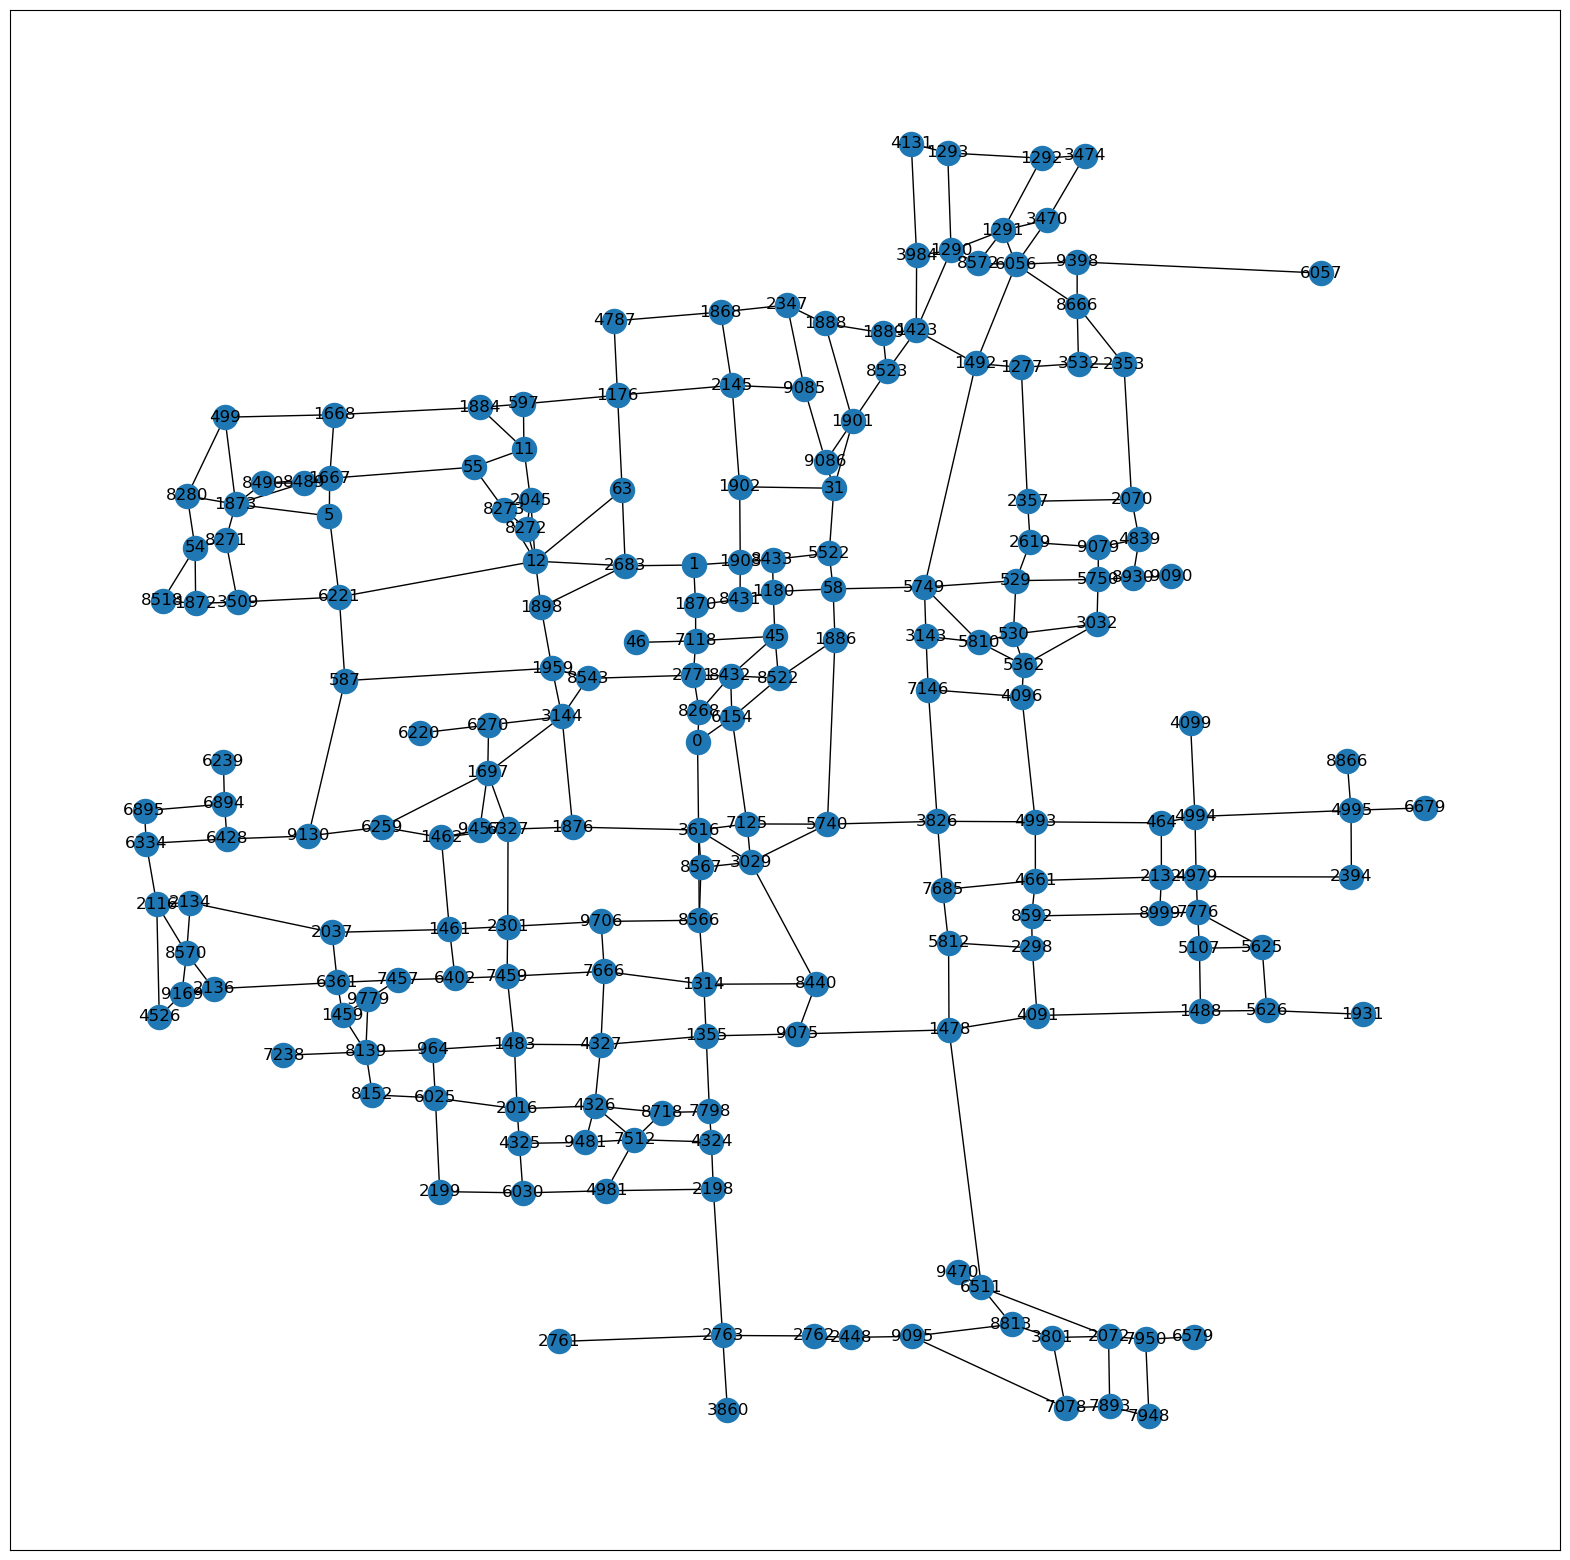

In [35]:
# Plot small sub graph

k = 9

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 0, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True)

In [10]:
# Stats
n_edges = len(g.edges)
node_strs = [str(i) for i in range(n_edges)]
#oneway = np.array([graph['edge_features']['oneway'][n][:][0] for n in node_strs])
#reversed_values = np.array([graph['edge_features']['reversed'][n][:][0] for n in node_strs])
#length_values = np.array([graph['edge_features']['length'][n][:][0] for n in node_strs])
#lanes_values = np.array([graph['edge_features']['lanes'][n][:][0] for n in node_strs])
#maxspeed_values = np.array([graph['edge_features']['maxspeed'][n][:][0] for n in node_strs])
oneway = np.array([graph['edge_features']['oneway']])
reversed_values = np.array([graph['edge_features']['reversed']])
length_values = np.array([graph['edge_features']['length']])
lanes_values = np.array([graph['edge_features']['lanes']])
maxspeed_values = np.array([graph['edge_features']['maxspeed']])
degrees = np.array(list(dict(g.degree).values()))

print(f"Number of nodes: {len(g.nodes)}")
print(f"Number of edges: {len(g.edges)}")
print(f"Is directed: {g.is_directed()}")
print(f"Min/Mean/Max degree of nodes: {degrees.min()}/{degrees.mean():.2f}/{degrees.max()}")
print(f"Oneways: {oneway.sum()}/{n_edges} ({100*oneway.mean():.2f})")
print(f"Reversed: {reversed_values.sum()}/{n_edges} ({100*reversed_values.mean():.2f})")
print(f"Min/Mean/Max values of length: {length_values.min()}/{length_values.mean():.2f}/{length_values.max()}")
print(f"Min/Mean/Max values of lanes: {lanes_values.min()}/{lanes_values.mean():.2f}/{lanes_values.max()}")
print(f"Min/Mean/Max values of max speed: {np.nanmin(maxspeed_values)}/{np.nanmean(maxspeed_values):.2f}/{np.nanmax(maxspeed_values)} ({np.isnan(maxspeed_values).mean()*100:.2f}% are NaN)")

Number of nodes: 9812
Number of edges: 16784
Is directed: False
Min/Mean/Max degree of nodes: 1/3.42/9
Oneways: 0/16784 (0.00)
Reversed: nan/16784 (nan)
Min/Mean/Max values of length: nan/nan/nan
Min/Mean/Max values of lanes: nan/nan/nan
Min/Mean/Max values of max speed: 20.0/71.19/120.0 (99.05% are NaN)


In [11]:
# Street type

highways = np.array([graph['edge_features']['highway']])
highway_values, highway_encoded, highway_counts = np.unique(highways, return_inverse=True, return_counts=True)

print(f"There are {len(highway_values)} different types of streets")
for val, c in zip(highway_values, highway_counts):
    print(f"{val}: {c} ({100*c/n_edges:.2f}%)")

There are 92 different types of streets
b"['cycleway', 'motorway']": 1 (0.01%)
b"['cycleway', 'pedestrian', 'residential']": 1 (0.01%)
b"['cycleway', 'primary', 'secondary']": 1 (0.01%)
b"['cycleway', 'primary']": 4 (0.02%)
b"['cycleway', 'residential', 'secondary']": 2 (0.01%)
b"['cycleway', 'residential', 'unclassified']": 1 (0.01%)
b"['cycleway', 'residential']": 27 (0.16%)
b"['cycleway', 'secondary']": 26 (0.15%)
b"['cycleway', 'tertiary', 'motorway']": 2 (0.01%)
b"['cycleway', 'tertiary', 'residential']": 2 (0.01%)
b"['cycleway', 'tertiary', 'secondary']": 4 (0.02%)
b"['cycleway', 'tertiary', 'trunk', 'residential']": 1 (0.01%)
b"['cycleway', 'tertiary', 'trunk', 'unclassified']": 1 (0.01%)
b"['cycleway', 'tertiary', 'unclassified', 'secondary']": 1 (0.01%)
b"['cycleway', 'tertiary', 'unclassified']": 1 (0.01%)
b"['cycleway', 'tertiary']": 36 (0.21%)
b"['cycleway', 'trunk', 'residential']": 1 (0.01%)
b"['cycleway', 'trunk', 'secondary']": 2 (0.01%)
b"['cycleway', 'trunk']": 18 (0.

([<matplotlib.patches.Wedge at 0x7f3a60323530>,
 [Text(1.0978894843641613, 0.06810785654090229, "b'cycleway'"),
  Text(1.0797776767918807, 0.2099527773141597, "b'motorway'"),
  Text(1.0598441869359445, 0.2945000839016641, "b'pedestrian'"),
  Text(0.9427331807009585, 0.5667928634037783, "b'primary'"),
  Text(-0.4902687973410382, 0.9847012269484446, "b'residential'"),
  Text(-1.0180703166816627, -0.41657271909199584, "b'secondary'"),
  Text(-0.02964546021660663, -1.0996004486578503, "b'tertiary'"),
  Text(0.9326151542961576, -0.5832915000042039, "b'trunk'"),
  Text(1.076934153407448, -0.22408219301092056, "b'unclassified'")])

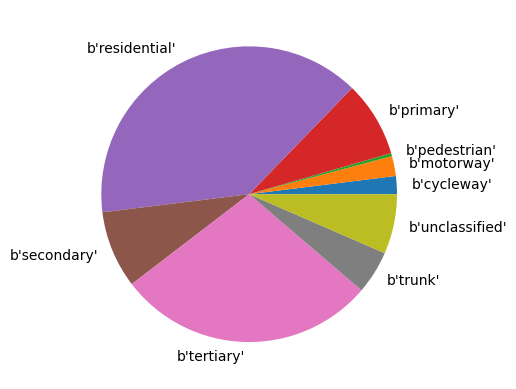

In [88]:
plt.pie(highway_counts, labels=highway_values)

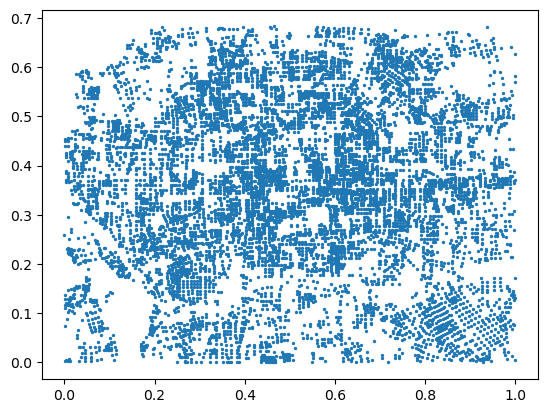

In [12]:
# Positions of nodes
positions = np.array(list(nx.get_node_attributes(g, 'loc').values()))
plt.scatter(positions[:, 0], positions[:, 1], s=2)

In [13]:
# Street names
street_names = np.array([graph['edge_features']['name']])

streetname_values, streetname_encoded, streetname_counts = np.unique(street_names, return_inverse=True, return_counts=True)
print(f"There are {len(streetname_values)} different street names")

streetname_dict = dict(zip(streetname_values, streetname_counts))
# works only with python >=3.8
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
streetname_dict = dict(sorted(streetname_dict.items(), key=lambda item: item[1], reverse=True))

print(f"The ten most common:")
for val in list(streetname_dict.keys())[:10]:
    print(f"{val}: {streetname_dict[val]} ({100*streetname_dict[val]/n_edges:.2f}%)")

There are 1931 different street names
The ten most common:
b'nan': 9223 (54.95%)
b'\xe5\x8c\x97\xe4\xba\x94\xe7\x8e\xaf': 45 (0.27%)
b'\xe8\xa5\xbf\xe4\xba\x94\xe7\x8e\xaf': 44 (0.26%)
b'\xe4\xb8\x9c\xe4\xba\x94\xe7\x8e\xaf': 42 (0.25%)
b'\xe5\x8d\x97\xe4\xba\x94\xe7\x8e\xaf': 36 (0.21%)
b'\xe8\xa5\xbf\xe4\xba\x8c\xe7\x8e\xaf': 32 (0.19%)
b'\xe9\xa6\x96\xe9\x83\xbd\xe6\x9c\xba\xe5\x9c\xba\xe9\xab\x98\xe9\x80\x9f\xe5\x85\xac\xe8\xb7\xaf': 31 (0.18%)
b'\xe4\xba\xac\xe8\x89\xaf\xe8\xb7\xaf': 28 (0.17%)
b'\xe5\x8c\x97\xe4\xb8\x89\xe7\x8e\xaf': 28 (0.17%)
b'\xe4\xb8\x9c\xe4\xba\x8c\xe7\x8e\xaf': 27 (0.16%)


In [14]:
trajects = f['trajectories']
trajects.keys()

<KeysViewHDF5 ['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111',

In [15]:
trajects['1000'].keys()

<KeysViewHDF5 ['coordinates', 'distance_observation_to_matched_edge', 'edge_idxs', 'edge_observation_ranges', 'edge_orientations', 'taxi_idx', 'timestamps']>

In [133]:
#trajects['000']['20081023025304.plt'].keys()

In [16]:
trajectories = []
sub_idx = []

for k in trajects.keys():
    #print(f"{k}:")
    #for s in trajects[k]['subtrajectories'].keys():
    trajectories.append(trajects[k]['edge_idxs'][:])
    #sub_idx.append({trajects[k], trajects[k]})

len(trajectories)

7218

In [30]:
len(sub_idx)

2414

In [18]:
trajectories[0]

array([15116, 15115, 15117,   470,   471, 16749,   462,   466, 11607,
       11606, 11486, 11122,  5276,  3908,  2138,  2137,  4117,  4116,
        8745,  9139,  9138,  1169,  1170,  1541,  1540,  5274,    65,
          67,   550,  3004,  3001,  8710,  8709, 14955,  9668])

In [64]:
sub_idx[800]

{<HDF5 group "/trajectories/335.txt" (4 members)>,
 <HDF5 group "/trajectories/335.txt/subtrajectories/3" (6 members)>}

In [20]:
x = trajects['0']['coordinates'][:]

In [21]:
def get_trajectory(trajects):
    x = trajects['0']['coordinates'][:]
    times = trajects['0']['timestamps'][:]

    dists = np.linalg.norm(x[1:] - x[:-1], axis=1)
    time_diffs = times[1:] - times[:-1]
    velos = dists / time_diffs
    
    return x, velos, times

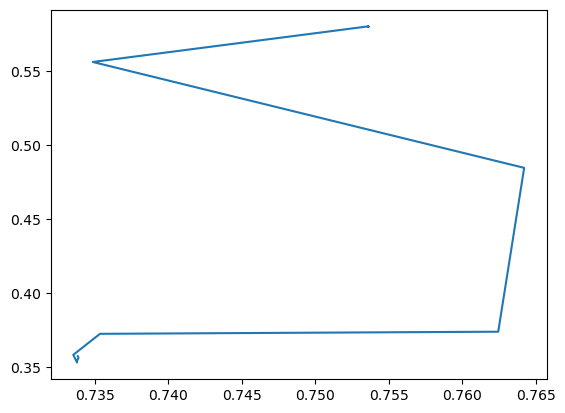

In [22]:
plt.plot(x[:, 0], x[:, 1])

(0.3353461865261735, 0.6089768729977418)

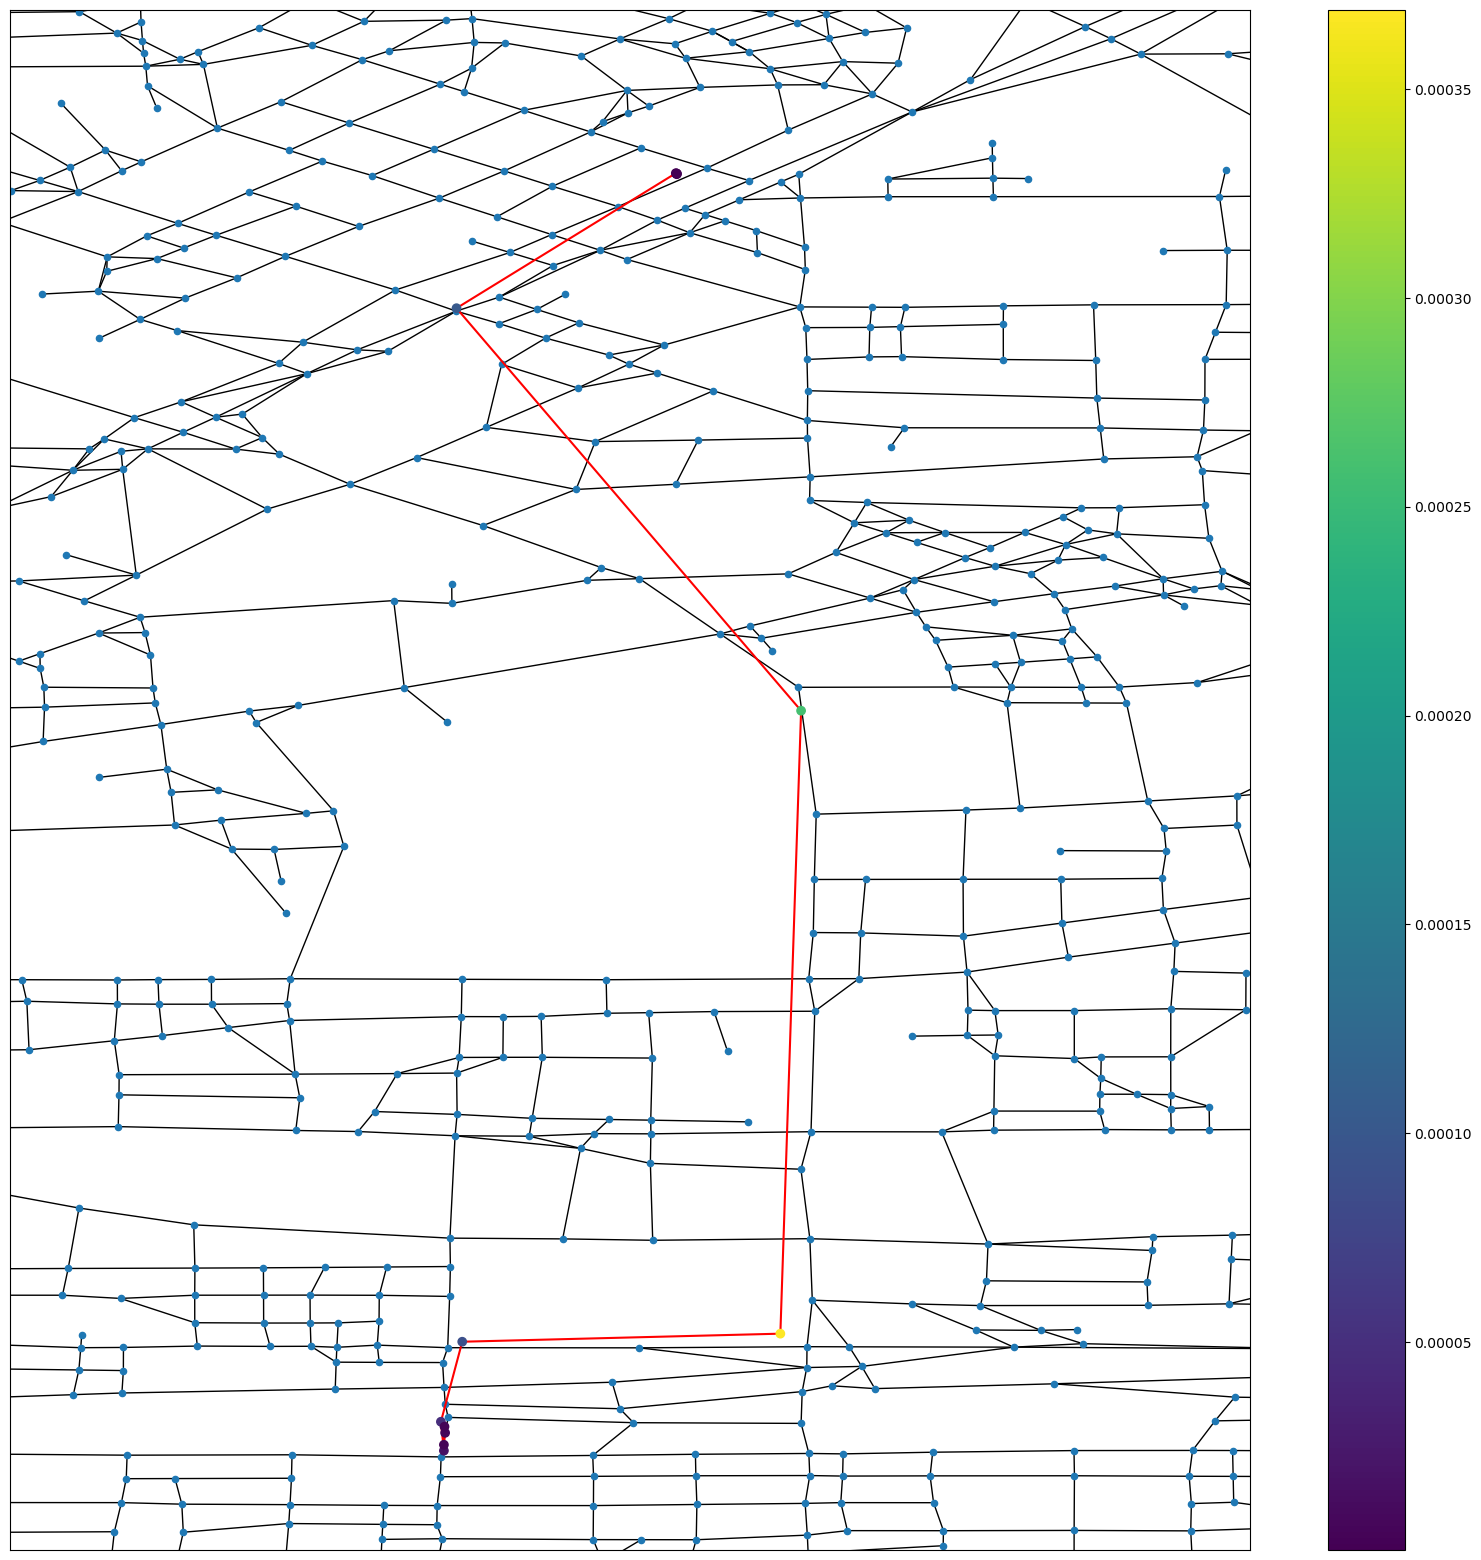

In [24]:
x, velos, times = get_trajectory(trajects)
k = 200

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 418, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)
ax.plot(x[:, 0], x[:, 1], color='red')
sc = ax.scatter(x[1:, 0], x[1:, 1], c=velos, zorder=100)
fig.colorbar(sc)
ax.set_xlim((x[:, 0].min()*0.95, x[:, 0].max()*1.05))
ax.set_ylim((x[:, 1].min()*0.95, x[:, 1].max()*1.05))
#nx.draw_networkx_nodes(sub_g, nodelist=trajectories[0], ax=ax, pos=pos, node_color='red')

(0.04261306206296408, 0.6812789592529448)

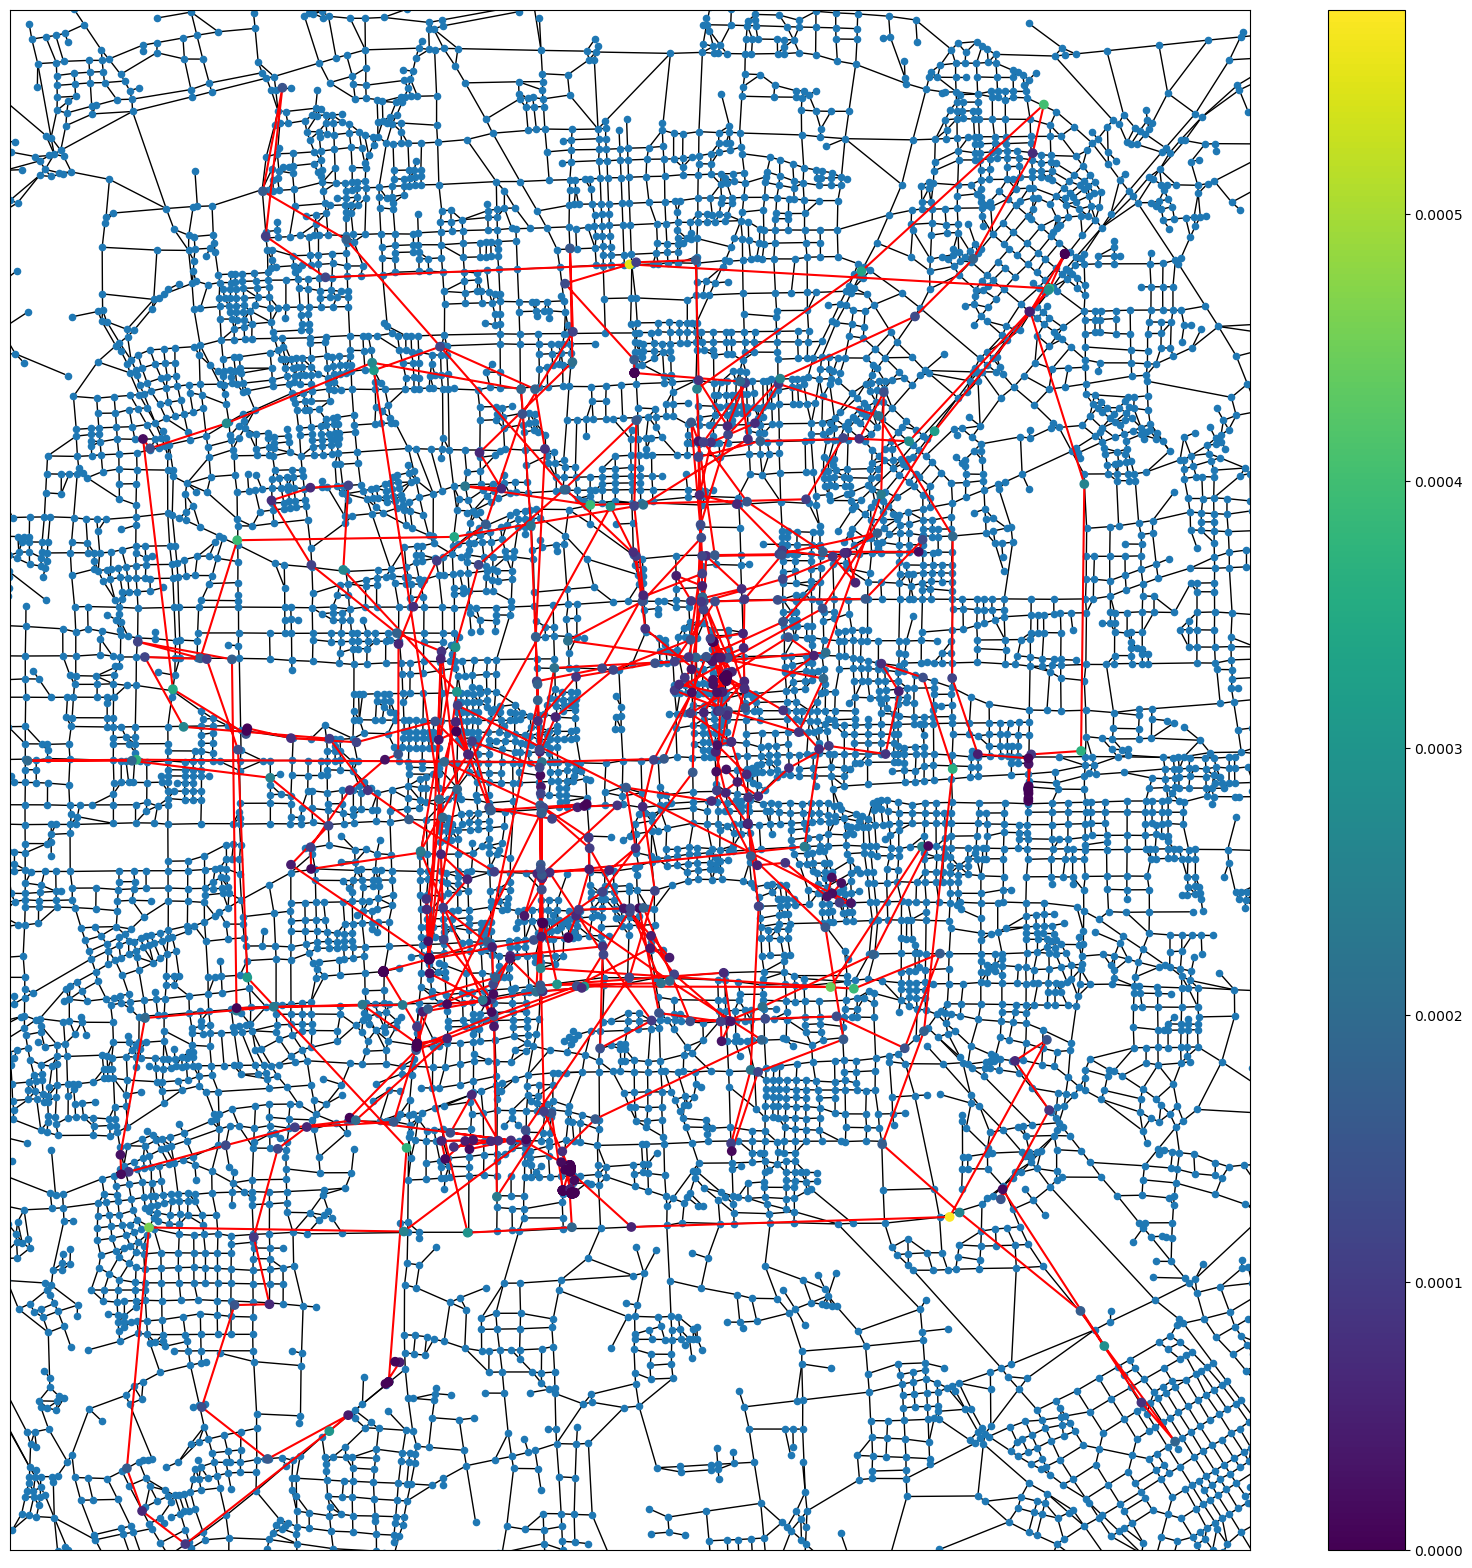

In [111]:
k = 200
x, velos, times = get_trajectory(trajects)

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 8511, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)
#nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=300, with_labels=True)
ax.plot(x[:, 0], x[:, 1], color='red')
sc = ax.scatter(x[1:, 0], x[1:, 1], c=velos, zorder=10)
fig.colorbar(sc)
ax.set_xlim((x[:, 0].min()*0.95, x[:, 0].max()*1.05))
ax.set_ylim((x[:, 1].min()*0.95, x[:, 1].max()*1.05))
#nx.draw_networkx_nodes(sub_g, nodelist=trajectories[0], ax=ax, pos=pos, node_color='red')

In [25]:
x.shape, times.shape

((14, 2), (14,))

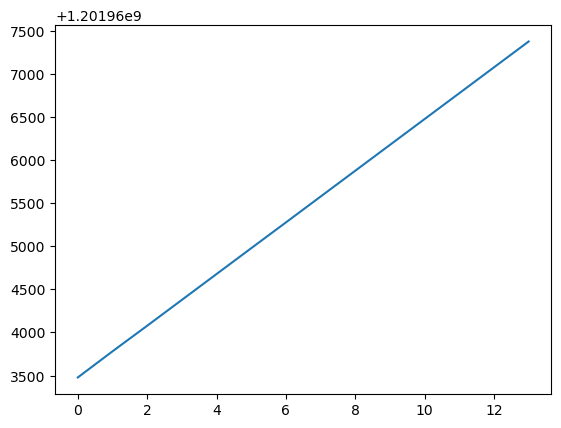

In [26]:
plt.plot(np.arange(len(times)), times)

In [27]:
trajects['0'].keys()

<KeysViewHDF5 ['coordinates', 'distance_observation_to_matched_edge', 'edge_idxs', 'edge_observation_ranges', 'edge_orientations', 'taxi_idx', 'timestamps']>

In [116]:
#trajects['10028.txt']['subtrajectories'].keys()

<KeysViewHDF5 ['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']>

In [45]:
trajects['0']['distance_observation_to_matched_edge'][:]

array([9.33784975e-04, 9.54554456e-04, 1.04574773e-03, 9.14823227e-04,
       1.09901752e-03, 4.20517842e-04, 5.17848761e-04, 2.28961030e-03,
       1.07332449e-03, 5.45528616e-04, 1.42923480e-04, 5.44639909e-05,
       2.26985984e-05, 1.66430154e-04])

In [28]:
trajects['0']['edge_observation_ranges'][:]

array([[20, 20],
       [20, 25],
       [25, 25],
       [25, 25],
       [25, 25],
       [25, 25],
       [25, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 26],
       [26, 27],
       [27, 27],
       [27, 27],
       [27, 27],
       [27, 27],
       [27, 27],
       [27, 27],
       [27, 27],
       [27, 27],
       [27, 28],
       [28, 28],
       [28, 29],
       [29, 29],
       [29, 29],
       [29, 29],
       [29, 29],
       [29, 34]])

In [25]:
trajects['0']['timestamps'][:]

array([1.20196348e+09, 1.20196378e+09, 1.20196408e+09, 1.20196438e+09,
       1.20196468e+09, 1.20196498e+09, 1.20196528e+09, 1.20196558e+09,
       1.20196588e+09, 1.20196618e+09, 1.20196648e+09, 1.20196678e+09,
       1.20196708e+09, 1.20196738e+09])

In [17]:
edges = trajects['0']['edge_idxs'][:]
edges

array([15116, 15115, 15117,   470,   471, 16749,   462,   466, 11607,
       11606, 11486, 11122,  5276,  3908,  2138,  2137,  4117,  4116,
        8745,  9139,  9138,  1169,  1170,  1541,  1540,  5274,    65,
          67,   550,  3004,  3001,  8710,  8709, 14955,  9668])

In [18]:
all_edges = graph['edges'][()]

print(all_edges[edges])

[[7056 8556]
 [7056 7057]
 [7057 9174]
 [ 140 9174]
 [ 140 9373]
 [9373 9507]
 [ 139 9507]
 [ 139 4587]
 [4585 4587]
 [4585 9526]
 [4523 9526]
 [4342 4523]
 [1765 4342]
 [1265 1765]
 [ 650 1265]
 [ 650 2640]
 [1342 2640]
 [1342 3153]
 [3153 4712]
 [3323 4712]
 [3323 3994]
 [ 337 3994]
 [ 337 1225]
 [ 453 1225]
 [ 453 6822]
 [1764 6822]
 [  19 1764]
 [  19  162]
 [ 162 8409]
 [ 950 8409]
 [ 950 7988]
 [3140 7988]
 [3140 7137]
 [6893 7137]
 [3590 6893]]


In [22]:
print(all_edges[15116])

[7056 8556]


(0.3353461865261735, 0.6089768729977418)

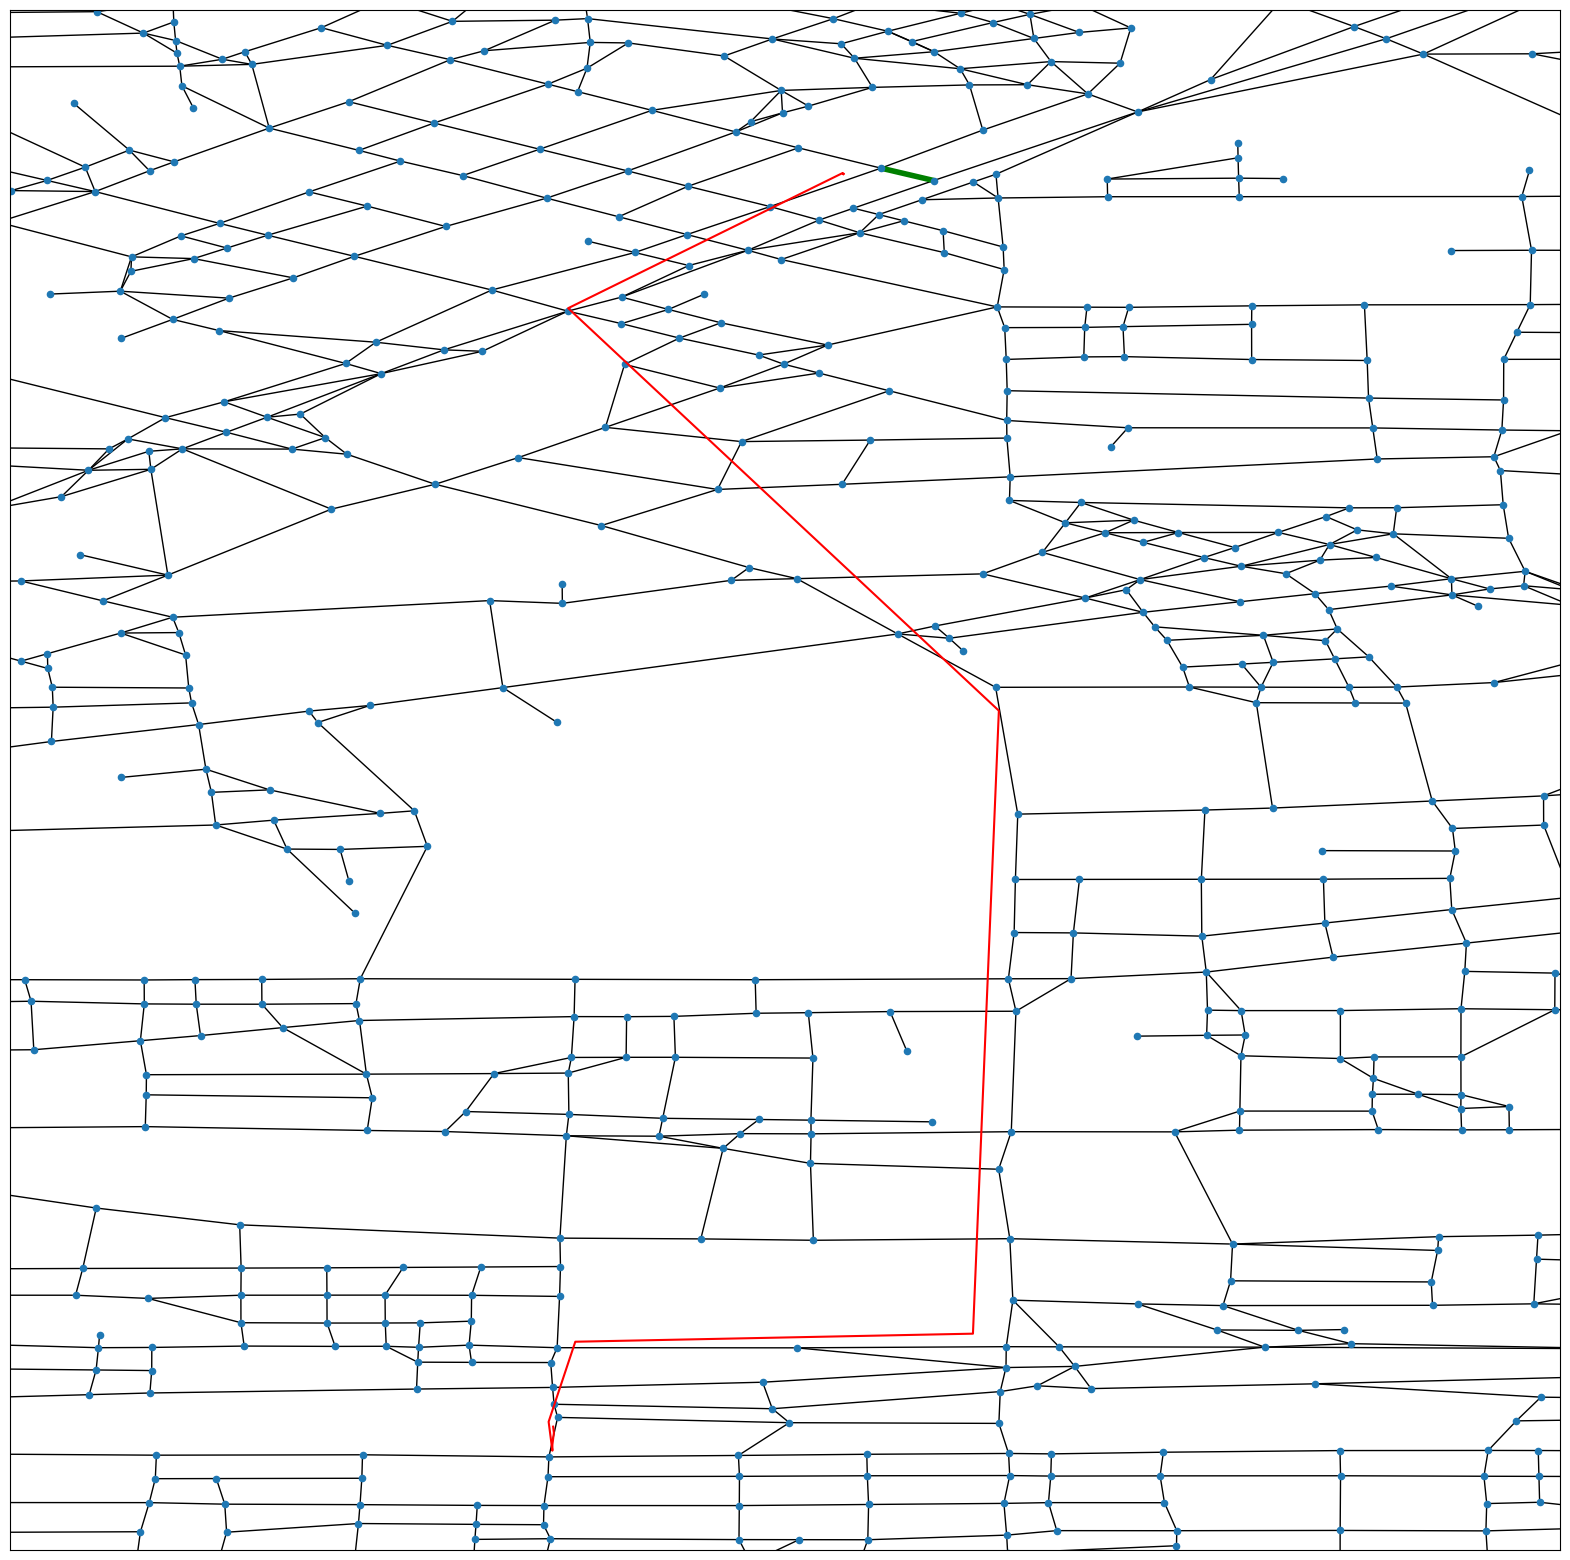

In [24]:
x = trajects['0']['coordinates'][:]

k = 200

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 8511, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)

nx.draw_networkx_edges(g, pos, edgelist=[all_edges[15116]], edge_color='green', width=4)
ax.plot(x[:, 0], x[:, 1], color='red')
#sc = ax.scatter(x[1:, 0], x[1:, 1], c=velos, zorder=100)
#fig.colorbar(sc)
ax.set_xlim((x[:, 0].min()*0.95, x[:, 0].max()*1.05))
ax.set_ylim((x[:, 1].min()*0.95, x[:, 1].max()*1.05))

(0.3353461865261735, 0.6089768729977418)

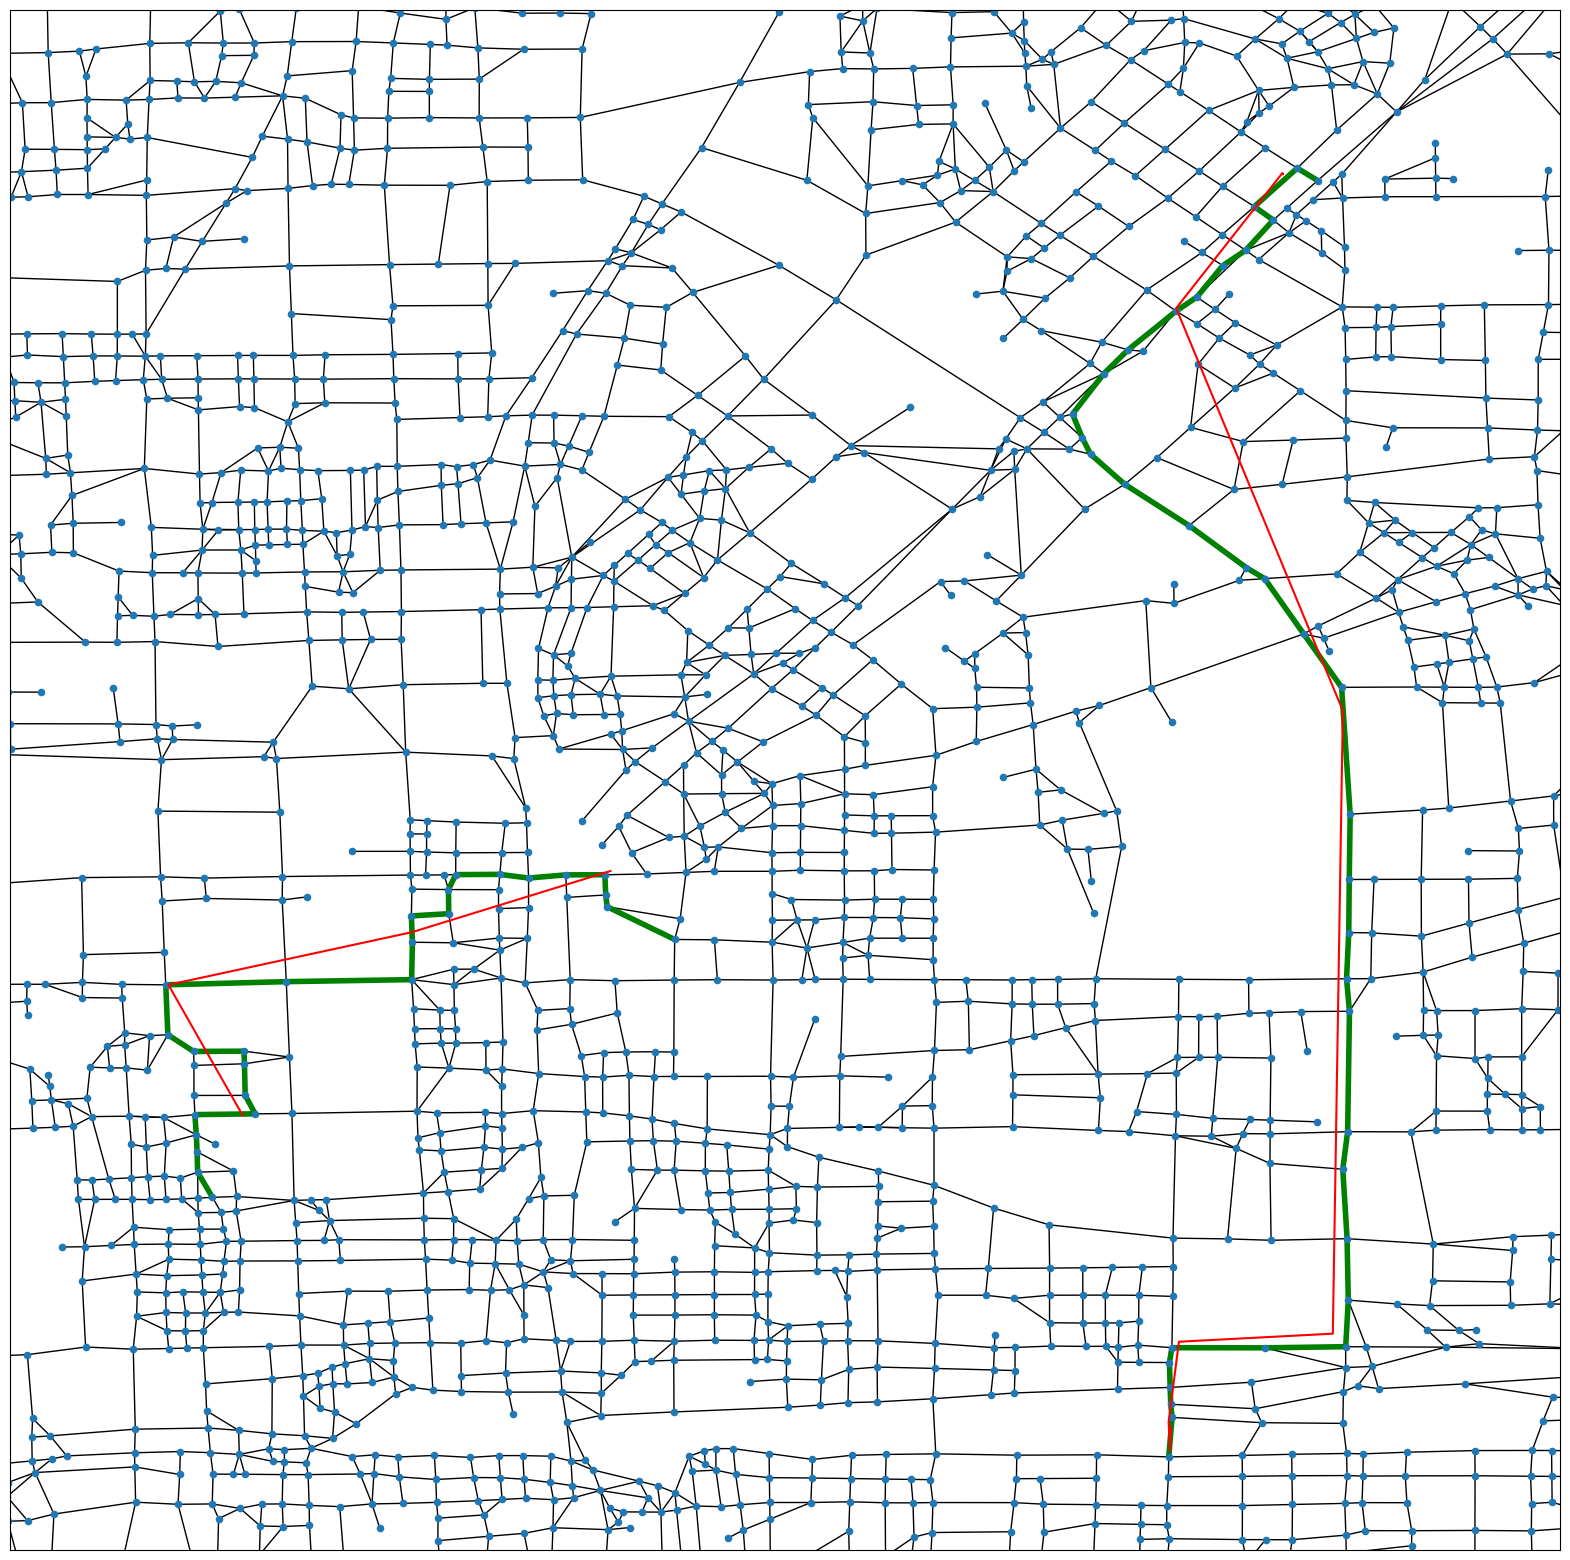

In [124]:
x = trajects['0']['coordinates'][:]

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 8511, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)

x0_min, x0_max = 100, -100
x1_min, x1_max = 100, -100

cnt = 0

for key in ['0', '1']:
    #cnt += 1
    x = trajects[key]['coordinates'][:]
    edges = trajects[key]['edge_idxs'][:]
    nx.draw_networkx_edges(g, pos, edgelist=all_edges[edges], edge_color='green', width=4)
    ax.plot(x[:, 0], x[:, 1], color='red')
    x0_min = min(x0_min, x[:, 0].min())
    x0_max = max(x0_max, x[:, 0].max())
    x1_min = min(x1_min, x[:, 1].min())
    x1_max = max(x1_max, x[:, 1].max())
    #if cnt > 3: break

ax.set_xlim((x0_min*0.95, x0_max*1.05))
ax.set_ylim((x1_min*0.95, x1_max*1.05))

KeyError: 9562

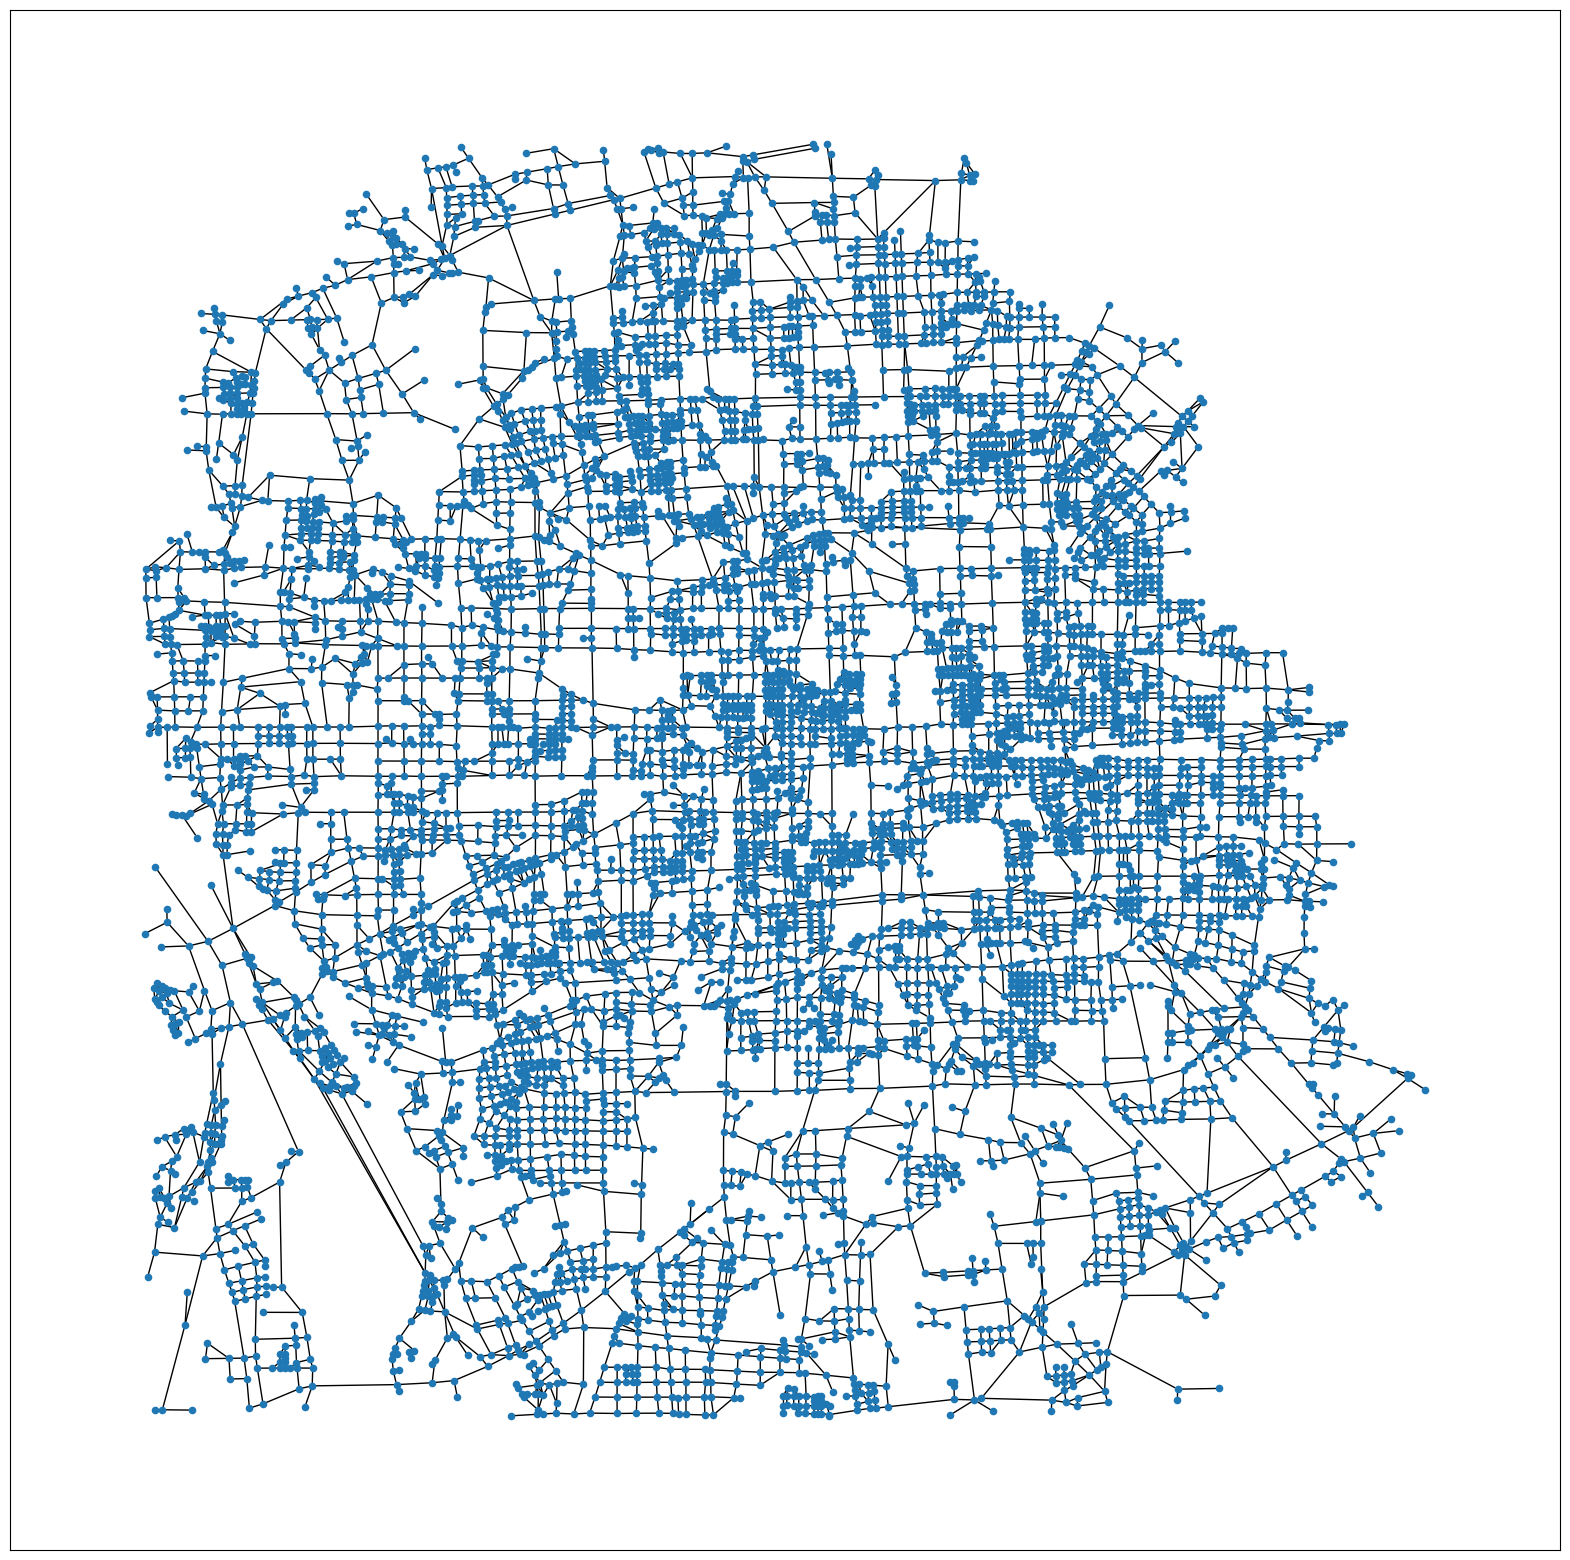

In [17]:
x = trajects['10028.txt']['subtrajectories']['7']['coordinates'][:]
k = 50
fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 8511, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)

x0_min, x0_max = 100, -100
x1_min, x1_max = 100, -100

for key in trajects['10028.txt']['subtrajectories']:
    x = trajects['10028.txt']['subtrajectories'][key]['coordinates'][:]
    edges = trajects['10028.txt']['subtrajectories'][key]['edge_idxs'][:]
    nx.draw_networkx_edges(g, pos, edgelist=all_edges[edges], edge_color='green', width=4)
    ax.plot(x[:, 0], x[:, 1], color='red')
    x0_min = min(x0_min, x[:, 0].min())
    x0_max = max(x0_max, x[:, 0].max())
    x1_min = min(x1_min, x[:, 1].min())
    x1_max = max(x1_max, x[:, 1].max())

ax.set_xlim((x0_min*0.95, x0_max*1.05))
ax.set_ylim((x1_min*0.95, x1_max*1.05))

In [ ]:
#Beginning here are copied from the file t-drive / geolife analysis

In [3]:
GEOLIFE, TDRIVE = 'geolife', 'tdrive'

WHICH = TDRIVE

unit_to_meters = 1 / 0.0000299927
unit_to_meters

33341.44641862853

In [4]:

if WHICH == GEOLIFE:
    paths = dict()

    # parse all paths
    merged_path = '/nfs/staff-ssd/fuchsgru/GeoLife/merged.h5'
    with h5py.File(merged_path) as hf:
        for user_idx in tqdm(list(hf['trajectories'].keys())):
            for record_file in hf['trajectories'][user_idx].keys():
                for subtrajectory_idx in hf['trajectories'][user_idx][record_file]['subtrajectories'].keys():
                    subtrajectory_group = hf['trajectories'][user_idx][record_file]['subtrajectories'][subtrajectory_idx]
                    path = {attr : subtrajectory_group[attr][:] for attr in subtrajectory_group.keys()}
                    paths[(user_idx, record_file, subtrajectory_idx)] = path
elif WHICH == TDRIVE:
    
    paths = dict()
    merged_path = '/ceph/hdd/students/zhzo/tdrive.h5'
    with h5py.File(merged_path) as hf:
        for subtrajectory_idx in tqdm(list(hf['trajectories'].keys())):
            #for subtrajectory_idx in hf['trajectories'][taxi_idx]['subtrajectories'].keys():
                #print (hf['trajectories'][taxi_idx]['subtrajectories'][subtrajectory_idx])
                #subtrajectory_group = hf['trajectories'][subtrajectory_idx][subtrajectory_idx]
                path = hf['trajectories'][subtrajectory_idx]
                #print(path.keys())
                assert (subtrajectory_idx) not in paths
                paths[subtrajectory_idx] = path
    

100%|█████████████████████████████████████████████████████████████████| 7218/7218 [00:01<00:00, 6701.81it/s]


In [66]:
len(paths)

7218

In [82]:
paths['0']

<Closed HDF5 group>

In [7]:
with h5py.File(merged_path) as hf:
    node_coordinates = hf['graph']['node_coordinates'][:]
    edges = hf['graph']['edges'][:]

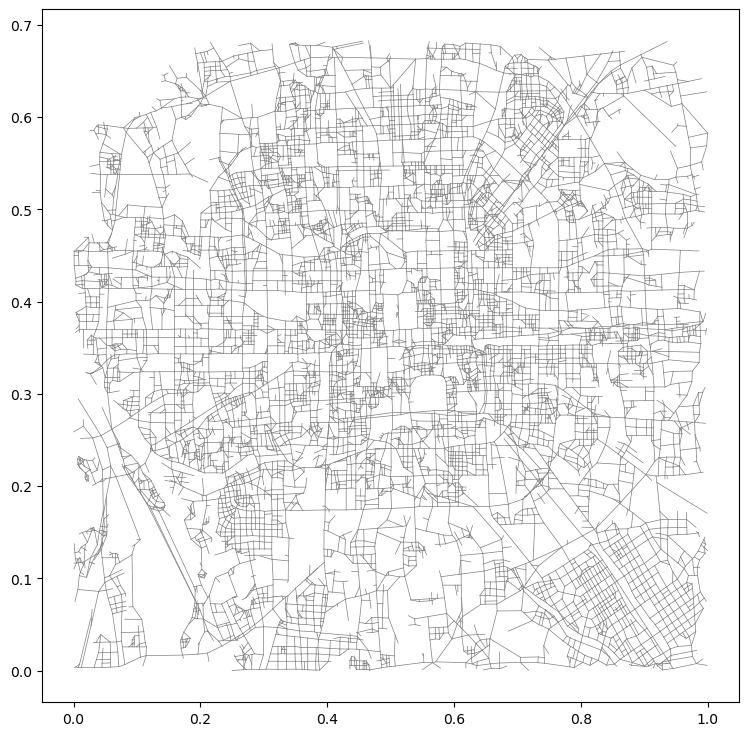

In [40]:
fig, ax = plt.subplots(figsize=(9, 9))
with h5py.File(merged_path) as hf:
    node_coordinates = hf['graph']['node_coordinates'][:]
    edges = hf['graph']['edges'][:]
    for ec in node_coordinates[edges]:
        ax.plot(ec[:, 0], ec[:, 1], c='grey', lw=.5)

In [41]:
print(node_coordinates.shape, edges.shape)

(9812, 2) (16784, 2)


/tmp/ipykernel_1858506/574055024.py:8: RuntimeWarning: Mean of empty slice.
  trajects[subtrajectory]['distance_observation_to_matched_edge'][:].mean()
/nfs/homedirs/zhzo/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


4553 7218


Text(0.5, 0, 'Avg Distance Observation -> Edge')

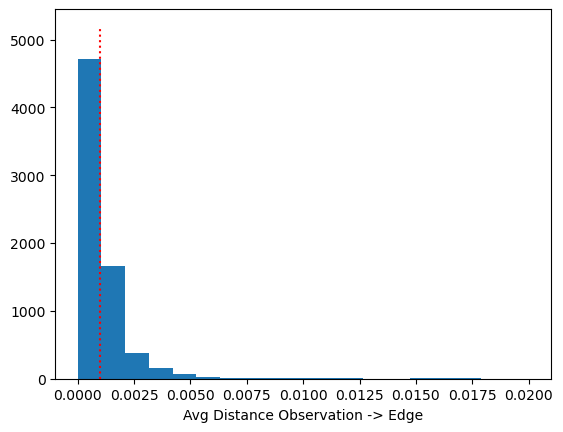

In [83]:

# Distribution of means of edge distance
mean_observation_to_edge_distances = dict()
#print(paths.items())
for subtrajectory in trajects:
    #print(key)
    #print(paths[subtrajectory].keys())
    mean_observation_to_edge_distances[subtrajectory] = \
        trajects[subtrajectory]['distance_observation_to_matched_edge'][:].mean()       
print((np.array(list(mean_observation_to_edge_distances.values())) < 1e-3).sum(), len(mean_observation_to_edge_distances))

fig, ax = plt.subplots()


counts, _, _ = ax.hist(np.array(list(mean_observation_to_edge_distances.values())), bins=np.linspace(0, 0.02, 20))
ax.vlines(1e-3, 0, 1.1 * counts.max(), color='red', linestyle='dotted')
#ax.set_xscale('log')
ax.set_xlabel('Avg Distance Observation -> Edge')

<HDF5 group "/trajectories/1502" (7 members)>
<HDF5 group "/trajectories/5870" (7 members)>
<HDF5 group "/trajectories/2684" (7 members)>
<HDF5 group "/trajectories/3952" (7 members)>


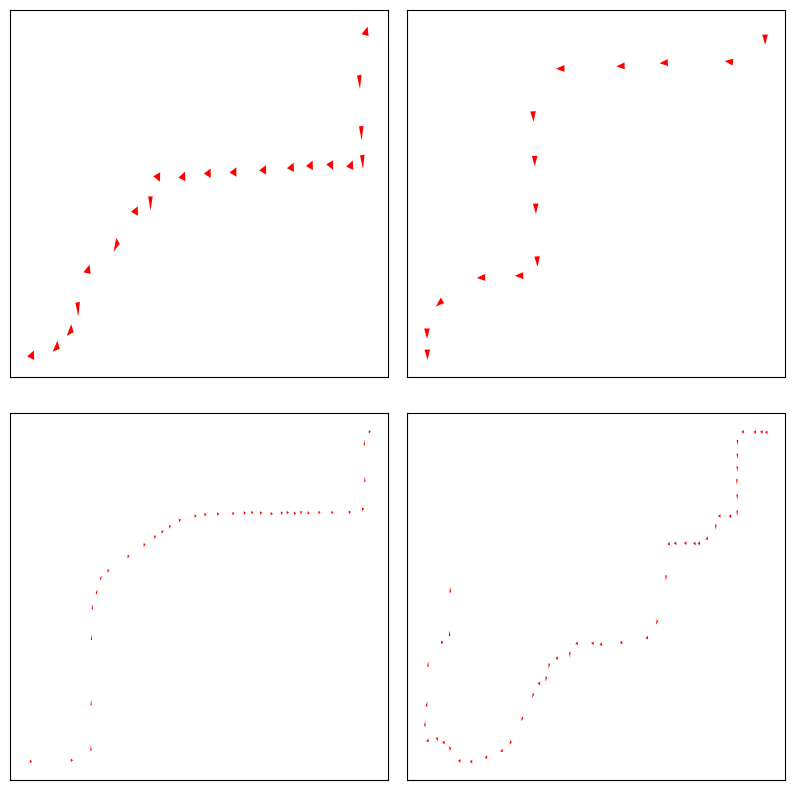

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'wspace' : 0.05, 'hspace' : 0.1})
#keys = list(paths.keys())
#print(keys)
with h5py.File(merged_path) as hf:
    trajects = hf['trajectories']
    for ax in axs.flatten():
        subtrajectory = trajects[str(np.random.choice(len(trajects)))]
        #key = ('9040.txt', '8')
        path = subtrajectory
        print(path)
        trajectory_coordinates = path['coordinates']
        trajectory_timestamps = path['timestamps']
        trajectory_edge_orientations = path['edge_orientations']
        trajectory_edge_idxs = path['edge_idxs']

        xmin, xmax = trajectory_coordinates[0]
        edge_mask = (node_coordinates[edges] >= xmin - 0.01).all(-1).any(-1) & (node_coordinates[edges] <= xmax + 0.01).all(-1).any(-1) 
        
        all_c = node_coordinates[edges[edge_mask]].reshape((-1, 2))
        #arrow_width = (all_c.max(axis=0) - all_c.min(axis=0)).max() * 0.01
        
        for ec, edge_idx in zip(node_coordinates[edges][edge_mask], np.arange(edges.shape[0], dtype=int)[edge_mask]):
            ax.plot(ec[:, 0], ec[:, 1], c='grey', lw=.5) #, c=1 - np.array((c, c, c, 0)))
            #ax1.arrow(*ec.mean(axis=0), *(np.diff(ec, axis=0).flatten() * 0.1 * ))
        for ec, orient in zip(node_coordinates[edges][trajectory_edge_idxs], trajectory_edge_orientations):
            #ax1.plot(ec[:, 0], ec[:, 1], c='red', lw=2, ls='dotted') #, c=1 - np.array((c, c, c, 0)))
            ax.arrow(*ec.mean(axis=0), *(np.diff(ec, axis=0).flatten() * 0.1 * orient), shape='full', ec='none', fc='red', 
                      width=0, head_width=0.001, zorder=2)
        c = trajectory_timestamps 
        #c = 1
        #c /= c.max()
        #ax.scatter(trajectory_coordinates[:, 0], trajectory_coordinates[:, 1], alpha=.9, marker='x', s=10, c=c, cmap='viridis')
        ax.set_xticks([])
        ax.set_yticks([])
        #print(key)
        if WHICH == GEOLIFE:
            ax.set_title(f'Avg Dist. Observation->edge: {(mean_observation_to_edge_distances[key]* unit_to_meters):.2f}m')

Edge Distribution

In [121]:
edge_cnt = Counter()
for path in trajects:
    for edge_idx in set(trajects[path]['edge_idxs']):
        edge_cnt[edge_idx] += 1

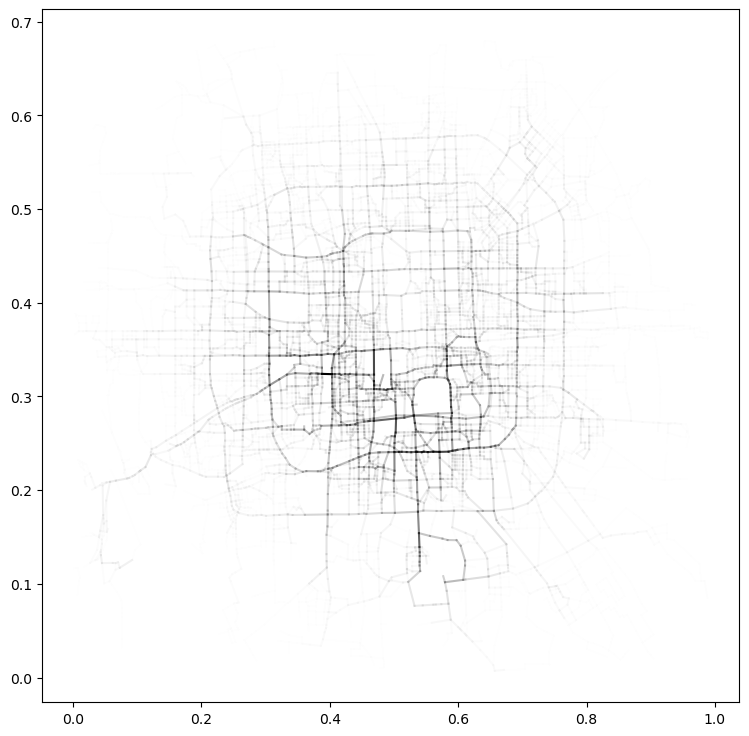

In [122]:
cmap = mpl.colormaps.get_cmap('Reds')
fig, ax = plt.subplots(figsize=(9, 9))
max_cnt = max(edge_cnt.values())
for edge_idx, cnt in edge_cnt.items():
    ec = node_coordinates[edges[edge_idx]]
    ax.plot(ec[:, 0], ec[:, 1], c=(0, 0, 0, cnt / max_cnt))

In [157]:
len(edge_cnt), edges.shape

(12057, (16784, 2))

Text(0.5, 0, '#Occurences of Edge')

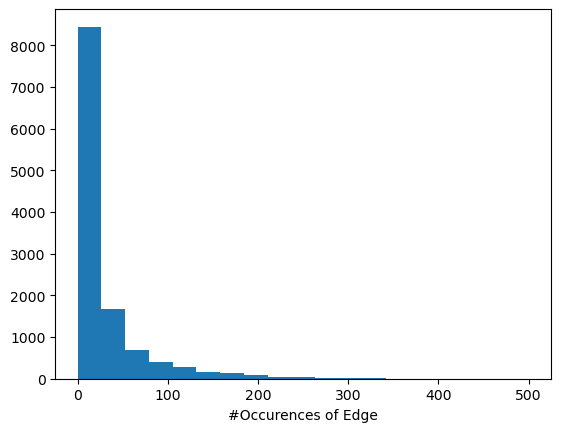

In [158]:
fig, ax = plt.subplots()
ax.hist(edge_cnt.values(), bins=np.linspace(0, 500, 20))
ax.set_xlabel('#Occurences of Edge')

#####Empirical Conditional and Unconditional Random Walk matrices

In [159]:
A_uncond = defaultdict(Counter) # From VxV -> probability
A_cond = defaultdict(lambda: defaultdict(Counter)) # From VxVxV -> probability (current, previous, next)

for key, path in paths.items():
    endpoints = edges[path['edge_idxs']]
    orientation = path['edge_orientations']
    endpoints[orientation != 1] = endpoints[orientation != 1][:, ::-1]
    assert (endpoints[1:, 0] == endpoints[:-1, 1]).all()
    for u, v in endpoints:
        A_uncond[u][v] += 1
    for (u, v), (v2, w) in zip(endpoints[:-1], endpoints[1:]):
        if v == v2:
            A_cond[v][u][w] += 1
        else:
            raise RuntimeError
    


In [160]:
prior = 20

node_entropies = dict()
for v, successors in tqdm(A_uncond.items()):
    probs = np.array(list(successors.values()), dtype=float) + prior
    probs /= probs.sum()
    node_entropies[v] = -(np.log(probs) * probs).sum()
    
conditional_node_entropies = defaultdict(dict)
for v, predecessors in tqdm(A_cond.items()):
    for prev, successors in predecessors.items():
        probs = np.array(list(successors.values()), dtype=float) + prior
        probs /= probs.sum()
        conditional_node_entropies[v][prev] = -(np.log(probs) * probs).sum() # H[vt+1 | vt, vt-1=v1]

conditional_kl_divergences = defaultdict(dict)
for v in tqdm(A_cond.keys()):
    predecessors = A_cond[v]
    for prev, successors in predecessors.items():
        cnt_cond, cnt_uncond = [], []
        for suc, cnt in successors.items():
            cnt_cond.append(cnt)
            cnt_uncond.append(A_uncond[v][suc])
        cnt_cond, cnt_uncond = np.array(cnt_cond, dtype=float) + prior, np.array(cnt_uncond, dtype=float) + prior
        cnt_cond /= cnt_cond.sum()
        cnt_uncond /= cnt_uncond.sum()
        conditional_kl_divergences[v][prev] = (cnt_uncond * (np.log(cnt_uncond) - np.log(cnt_cond))).sum()
        

100%|█████████████████████████████████████████████████████████████████| 7641/7641 [00:00<00:00, 7939.71it/s]


(7653, 4)


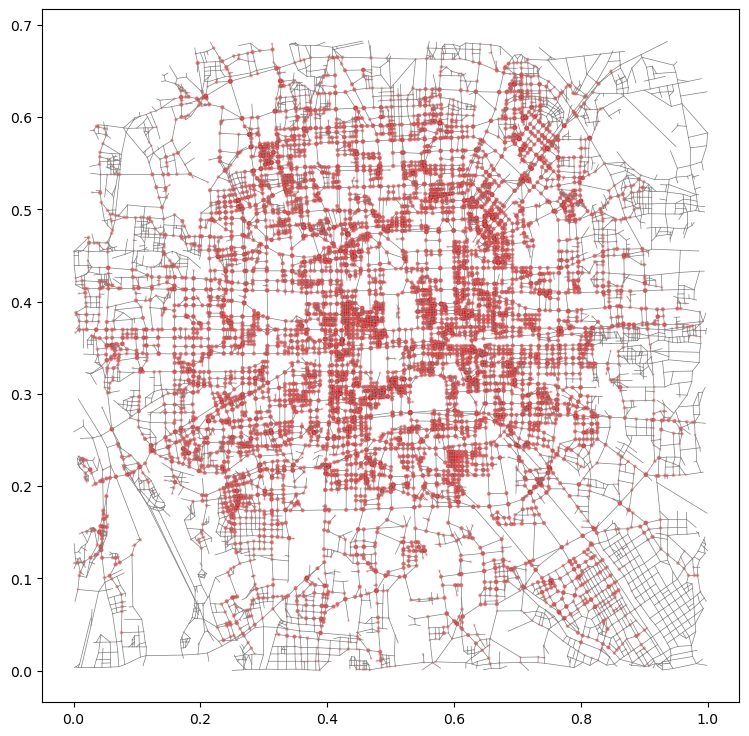

In [161]:
fig, ax = plt.subplots(figsize=(9, 9))
v, e = zip(*node_entropies.items())
v, e = np.array(v), np.exp(np.array(e))
c = np.array([[0, 0, 0, 1.]])
c = (e / e.max())[:, None] * c
c[:, 0] = 1
print(c.shape)

plt.scatter(node_coordinates[v][:, 0], node_coordinates[v][:, 1], s=e / e.max() * 10, c= c, zorder=2)
for ec in node_coordinates[edges]:
    ax.plot(ec[:, 0], ec[:, 1], lw=.5, c='grey')


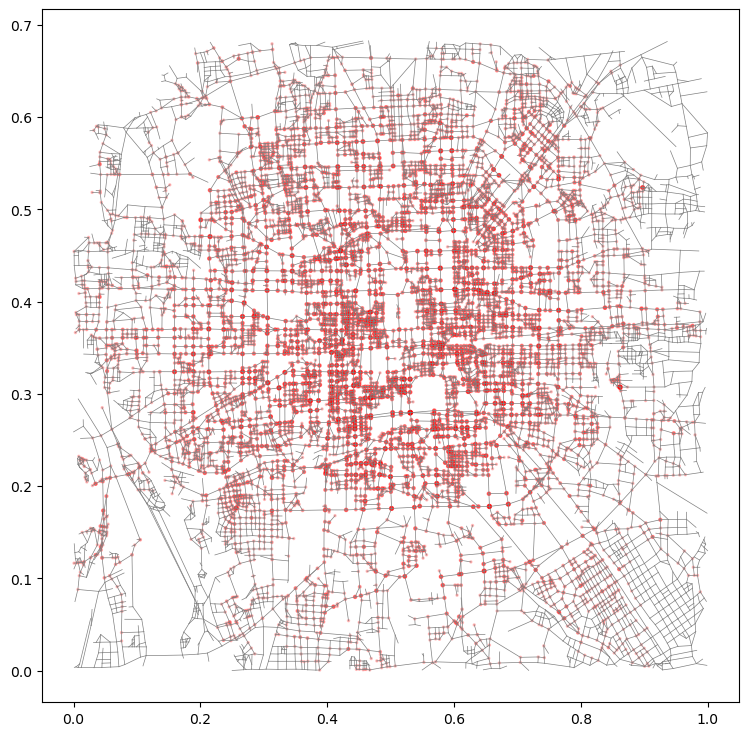

In [162]:

v, e = zip(*conditional_node_entropies.items())
e = np.array([np.mean(list(entropies.values())) for entropies in e])
e = np.exp(e)
v = np.array(v)

fig, ax = plt.subplots(figsize=(9, 9))
c = np.array([[0, 0, 0, 1.]])
c = (e / e.max())[:, None] * c
c[:, 0] = 1

plt.scatter(node_coordinates[v][:, 0], node_coordinates[v][:, 1], s=e / e.max() * 10, c= c, zorder=2)
for ec in node_coordinates[edges]:
    ax.plot(ec[:, 0], ec[:, 1], lw=.5, c='grey')

In [164]:

v, e = zip(*conditional_kl_divergences.items())
e = np.array([np.max(list(kldivs.values())) for kldivs in e])
v = np.array(v)

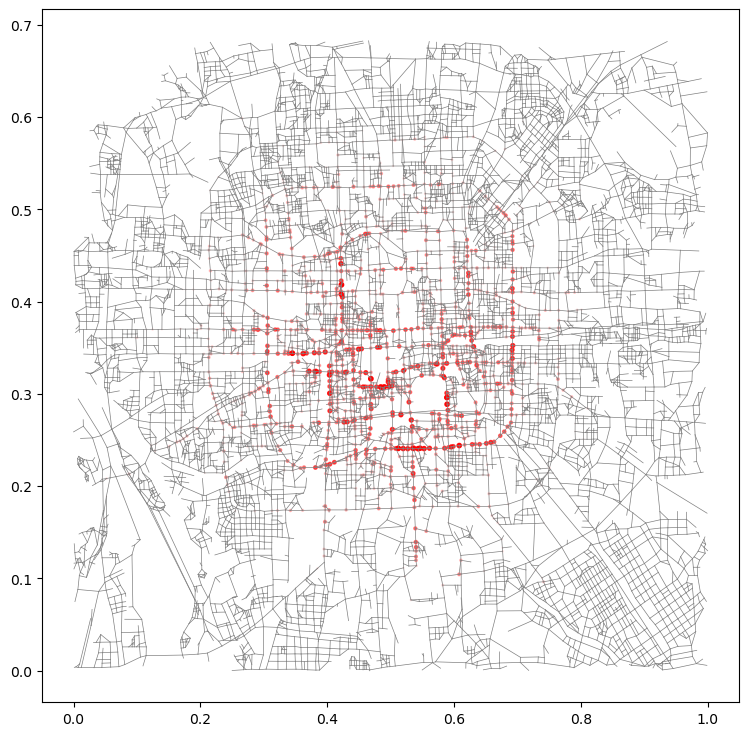

In [165]:


fig, ax = plt.subplots(figsize=(9, 9))
c = np.array([[0, 0, 0, 1.]])
c = (e / e.max())[:, None] * c
c[:, 0] = 1

plt.scatter(node_coordinates[v][:, 0], node_coordinates[v][:, 1], s=e / e.max() * 10, c= c, zorder=2)
for ec in node_coordinates[edges]:
    ax.plot(ec[:, 0], ec[:, 1], lw=.5, c='grey')

Plot conditional distributions at nodes with highest shifts¶

[[0.42208313 0.42263458]
 [0.42236546 0.41119224]
 [0.42011086 0.41772063]
 [0.42070832 0.41383212]]
[[0.42236546 0.41119224]
 [0.42011086 0.41772063]
 [0.42070832 0.41383212]
 [0.42208313 0.42263458]]
[[0.42208313 0.42263458]
 [0.42011086 0.41772063]]
[[0.42208313 0.42263458]]
[[0.42208313 0.42263458]
 [0.42236546 0.41119224]]
[[0.50794493 0.24085455]
 [0.51974297 0.24071664]
 [0.51236025 0.24534485]]
[[0.50794493 0.24085455]
 [0.51974297 0.24071664]
 [0.51236025 0.24534485]]
[[0.51974297 0.24071664]
 [0.50794493 0.24085455]
 [0.51236025 0.24534485]]
[[0.50794493 0.24085455]]
[[0.46081318 0.32305186]
 [0.46892318 0.323352  ]
 [0.46913319 0.31193217]]
[[0.46913319 0.31193217]
 [0.46081318 0.32305186]
 [0.46892318 0.323352  ]]


/tmp/ipykernel_1341142/675239259.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(node_coordinates[list(successors)][:, 0], node_coordinates[list(successors)][:, 1], c=c, cmap='Reds')


[[0.46913319 0.31193217]]
[[0.46081318 0.32305186]
 [0.46892318 0.323352  ]
 [0.46913319 0.31193217]]


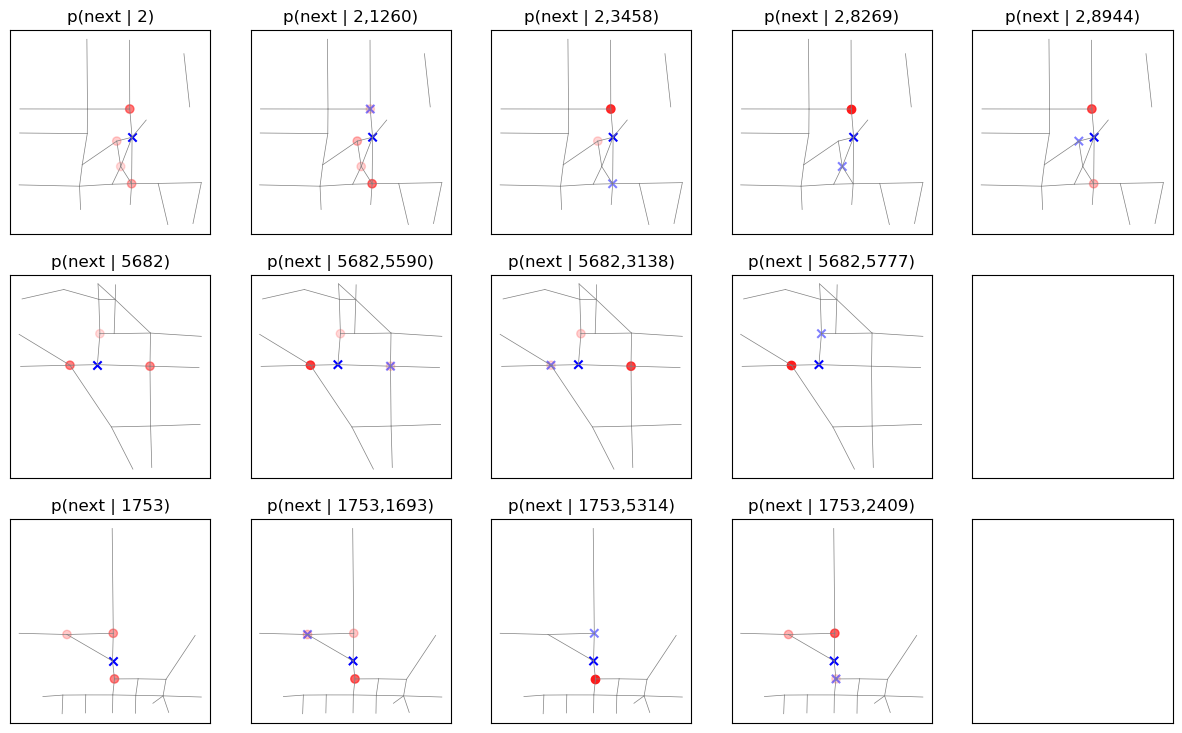

In [166]:
nodes_with_distribution_shift = list(sorted(conditional_kl_divergences, key=lambda v: -max(conditional_kl_divergences[v].values())))

k1, k2 = 3, 4

fig, axs = plt.subplots(k1, k2 + 1, figsize=(k2 * 3 + 3, k1 * 3))
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
for v_idx, v in enumerate(nodes_with_distribution_shift[:k1]):
    # Get only the predecessors that shift the most
    preds = list(sorted(conditional_kl_divergences[v], key=lambda x: -max(conditional_kl_divergences[x].values())))
    vmin, vmax = node_coordinates[v], node_coordinates[v]
    edge_mask = (node_coordinates[edges] >= vmin[None, :] - 0.01).all(-1).any(-1) & (node_coordinates[edges] <= vmax[None, :] + 0.01).all(-1).any(-1) 
    
    for pred_idx, pred in enumerate([None] + preds[:k2]):
        ax = axs[v_idx, pred_idx]
        if pred is None:
            ax.set_title(f'p(next | {v})')
        else:
            ax.set_title(f'p(next | {v},{pred})')
        for ec in node_coordinates[edges[edge_mask]]:
            ax.plot(ec[:, 0], ec[:, 1], lw=.5, color='grey')
        
        if pred is None:
            successors, cnts = zip(*A_uncond[v].items())
        else:
            successors, cnts = zip(*A_cond[v][pred].items())
        cnts = np.array(cnts, dtype=float) + prior
        c = np.array([[0, 0, 0, 1.]])
        c = ((cnts / cnts.sum())[:, None] * c * 0.9) + 0.1
        c[:, 0] = 1
        
        print(node_coordinates[list(successors)])
        ax.scatter(node_coordinates[list(successors)][:, 0], node_coordinates[list(successors)][:, 1], c=c, cmap='Reds')
        if pred is None:
            ax.scatter(node_coordinates[[v]][:, 0], node_coordinates[[v]][:, 1], c=[(0, 0, 1, 1)], marker='x')
        else:
            ax.scatter(node_coordinates[[v, pred]][:, 0], node_coordinates[[v, pred]][:, 1], c=[(0, 0, 1, 1), (0, 0, 1, 0.5)], marker='x')
        
    


In [ ]:
keys = list(paths.keys())
#print(keys)
with h5py.File(merged_path) as hf:
   
        trajectory_coordinates = path['coordinates']
        trajectory_timestamps = path['timestamps']
        trajectory_edge_orientations = path['edge_orientations']
        trajectory_edge_idxs = path['edge_idxs']

In [73]:
f = h5py.File('/ceph/hdd/students/zhzo/T-drive/merged.h5', 'r')

In [74]:
f['graph'].keys()

<KeysViewHDF5 ['coordinate_scale', 'coordinate_shift', 'edge_features', 'edges', 'node_coordinates', 'node_features']>

In [226]:
f['graph']['edges'][:].shape

(16784, 2)

In [241]:
graph['node_features']['x']['11'][:]

array([116.3208398, 116.3214917, 116.3214295])

In [229]:
graph['node_coordinates'][()].min(axis=0), graph['node_coordinates'][()].max(axis=0)

(array([ 1.44042492e-05, -2.72632462e-04]), array([0.99985229, 0.68290869]))

In [2]:
n_trajectories = 0

len_subtrajectory = []

for su in f['trajectories']:
    n_trajectories += 1
    
    len_subtrajectory.append(f['trajectories'][su]['edge_idxs'][:].shape[0])
len_subtrajectory = np.array(len_subtrajectory)

In [3]:
n_trajectories

7218

In [4]:
len_subtrajectory[9]

36

In [101]:
len_subtrajectory.min()

5

In [102]:
len_subtrajectory.max()

50

In [103]:
print((len_subtrajectory <= 10).sum())

1301


In [108]:
print(n_trajectories)

7218


In [7]:
length = [10, 20, 30, 40, 50]
for i in range(5, 50):
    print("There are " +str((len_subtrajectory == i).sum()) + "edges equal " + str(i) + "(" + str((len_subtrajectory == i).sum() / n_trajectories)+")")

There are 238edges equal 5(0.032973122748683845)
There are 220edges equal 6(0.030479357162648935)
There are 232edges equal 7(0.03214186755333887)
There are 217edges equal 8(0.03006372956497645)
There are 179edges equal 9(0.024799113327791632)
There are 215edges equal 10(0.02978664449986146)
There are 230edges equal 11(0.031864782488223886)
There are 214edges equal 12(0.029648101967303962)
There are 207edges equal 13(0.028678304239401497)
There are 219edges equal 14(0.030340814630091438)
There are 206edges equal 15(0.028539761706844)
There are 196edges equal 16(0.02715433638126905)
There are 174edges equal 17(0.024106400665004156)
There are 153edges equal 18(0.02119700748129676)
There are 175edges equal 19(0.024244943197561653)
There are 171edges equal 20(0.02369077306733167)
There are 184edges equal 21(0.025491825990579108)
There are 171edges equal 22(0.02369077306733167)
There are 166edges equal 23(0.022998060404544194)
There are 168edges equal 24(0.023275145469659187)
There are 185ed

In [109]:
d=0
for i in range(60):
    print(i, (len_subtrajectory == i).sum())
    d += (len_subtrajectory == i).sum()
print(d)

0 0
1 0
2 0
3 0
4 0
5 238
6 220
7 232
8 217
9 179
10 215
11 230
12 214
13 207
14 219
15 206
16 196
17 174
18 153
19 175
20 171
21 184
22 171
23 166
24 168
25 185
26 164
27 152
28 144
29 145
30 140
31 141
32 155
33 151
34 128
35 129
36 123
37 145
38 138
39 124
40 96
41 118
42 112
43 112
44 89
45 114
46 90
47 104
48 103
49 92
50 89
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
7218


In [110]:
(len_subtrajectory > 100).sum()

0

In [81]:
len_subtrajectory.shape

(2414,)